In [ ]:
# Scikit gradient boosting regressor diagnostics

From https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

## Setup libraries

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [3]:
import matplotlib.pyplot as plt

## Get dataset

Load data

In [4]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

Get data set dimensions

In [5]:
print(f'{X.shape}, {y.shape}')

(442, 10), (442,)


Averages of each of of 10 predictors

## Get training and test datasets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0)

In [7]:
print(f'Train size: {X_train.shape}, Test size: {X_test.shape}')

Train size: (397, 10), Test size: (45, 10)


In [8]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

## Gradient boosting model

In [9]:
reg = GradientBoostingRegressor(**params, random_state=0)

In [10]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500, random_state=0)

In [11]:
mse = mean_squared_error(y_test, reg.predict(X_test))

In [12]:
print(f'Mean suqred error (MSE) on test set: {mse}')

Mean suqred error (MSE) on test set: 3436.943471167774


## Plot training deviance

Compute test set deviance

In [13]:
test_score = np.zeros(reg.n_estimators, dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

In [14]:
reg.n_estimators

500

Text(0.5, 1.0, 'Deviance vs iterations')

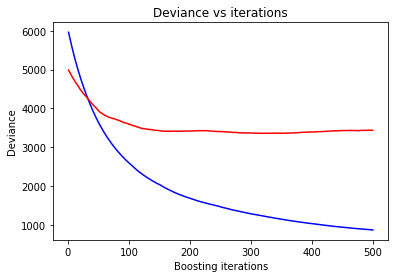

In [15]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(reg.n_estimators) + 1, reg.train_score_, 'b-',
        label='Training set deviance')
ax.plot(np.arange(reg.n_estimators) + 1, test_score, 'r-',
        label='Test set deviance')
ax.set_xlabel('Boosting iterations')
ax.set_ylabel('Deviance')
ax.set_title('Deviance vs iterations')

## Plot feature importance

Impurity based feature importance can be misleading for high cardinaltiy features. Permutation importance computed on a test set is an alternative.

get gbm feature importance

In [16]:
feature_importance1 = pd.DataFrame({
    'feature_name': diabetes.feature_names,
    'importance': reg.feature_importances_})

In [17]:
feature_importance2 = feature_importance1.sort_values(
    by='importance', ascending=False)

get permutation based feature importance

In [18]:
result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

In [19]:
fi_permutation = pd.DataFrame(
    result.importances.T, columns=diabetes.feature_names)

In [20]:
fi_permutation2 = pd.melt(
    fi_permutation, value_vars=fi_permutation.columns)

get permutation feature importance ordering

In [21]:
fi_mean = pd.Series(
    result.importances_mean, index=diabetes.feature_names
).sort_values(ascending=False)

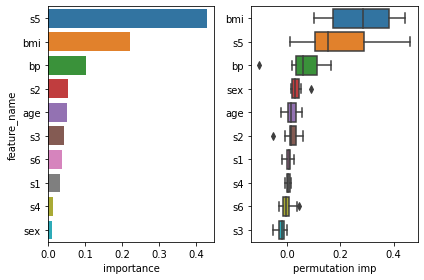

In [22]:
fig, ax = plt.subplots(1, 2)
sns.barplot(
    data=feature_importance2, y='feature_name', x='importance',
    ax=ax[0])

sns.boxplot(
    data=fi_permutation2, y='variable', x='value',
    order=fi_mean.index, ax=ax[1])
ax[1].set_xlabel('permutation imp')
ax[1].set_ylabel('')
fig.set_tight_layout('tight')